In [26]:
import io
import re
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


$$
wage = \beta_0 + \beta_1 * educ +\beta_2 * exper
$$

In [39]:
model = smf.ols(formula = 'wage~educ+exper', data=df).fit()
model.params.round(3)

Intercept   -3.391
educ         0.644
exper        0.070
dtype: float64

$$
wage = -3.391 + 0.644 * educ +0.070 * exper
$$

1. При увеличении уровня образования на 1 единицу зарплата увеличивается на 0.644, при прочих равных
2. Когда сотрудник имеет опыт на одну единицу больше, то заработная плата увеличивается на 0.070


# Зависимость зарплаты от уровня образования

<AxesSubplot:xlabel='educ', ylabel='wage'>

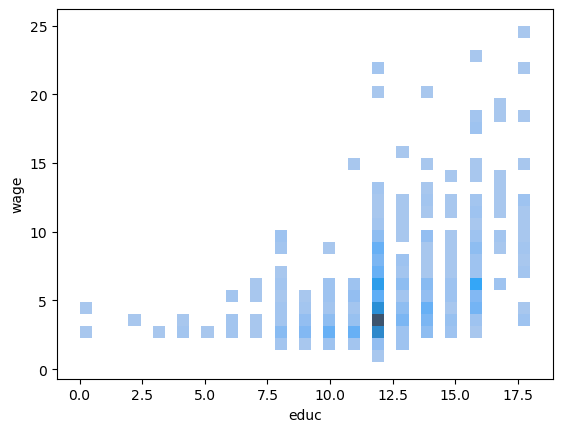

In [9]:
sns.histplot(data=df, x='educ', y='wage')

Как мы можем заметить, зарплата увеличивается по мере увеличения уровня образования

# График показывающий зависимость зарплаты от опыта

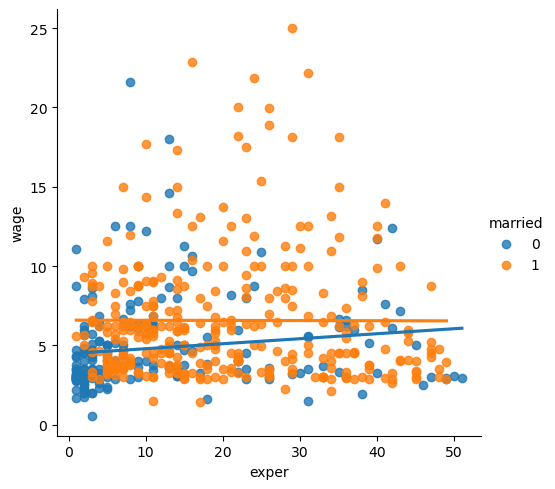

In [10]:
sns.lmplot(data = df, x = 'exper', y = 'wage', ci=None, hue='married')

<AxesSubplot:xlabel='educ', ylabel='wage'>

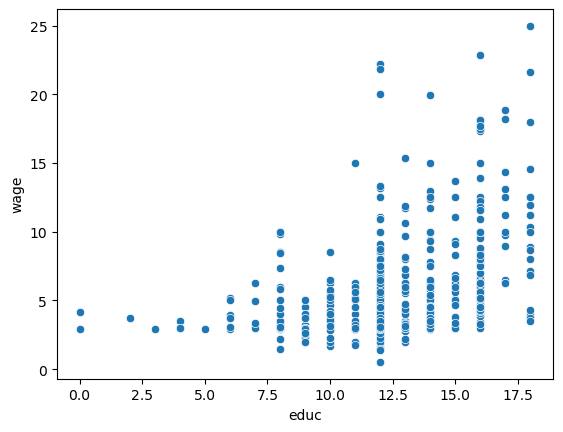

In [11]:
sns.scatterplot(data=df, y = 'wage', x = 'educ')

<AxesSubplot:xlabel='educ', ylabel='wage'>

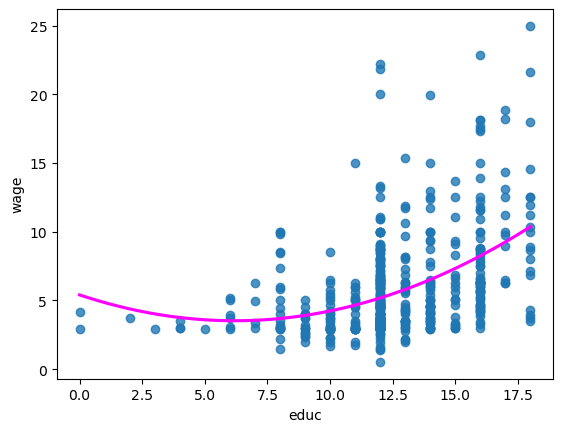

In [12]:
sns.regplot(data=df, y = 'wage', x = 'educ', ci=None, order = 2, line_kws ={"color":"magenta"})

При графическом анализе можно заметить, что самые высокие заработные платы получают только те. у которых самый высокий уровень оюразования

In [12]:
df['exper^2']  = df['exper']*df['exper']
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,exper^2
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,1.131402,4,0,4
1,3.24,12,22,2,0,1,1,3,1,0,...,0,1,0,0,0,1,1.175573,484,4,484
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,4
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,1936
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,1,1,0,0,2.708050,196,4,196
522,2.27,10,2,0,0,1,0,3,0,0,...,1,0,0,1,0,0,0.819780,4,0,4
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,1,0,0,1.541159,169,324,169
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,2.447551,25,1,25


$$
wage = \beta_0 + \beta_1 * educ +\beta_2 * exper^2
$$

<AxesSubplot:xlabel='exper^2', ylabel='wage'>

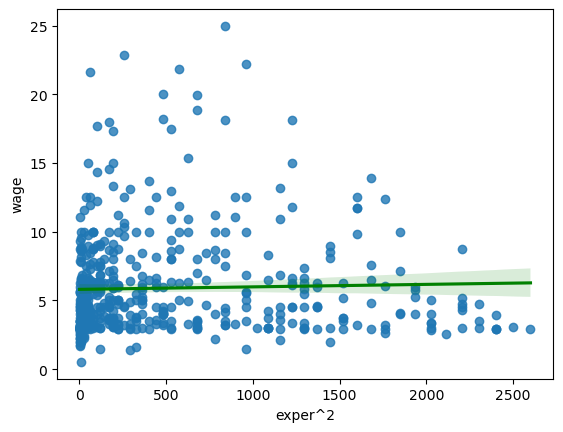

In [13]:
sns.regplot(data = df, y = 'wage', x = 'exper^2',  line_kws ={"color":"green"})

Я изменила зависимость с линейной на квадратическую

можно наблюдать концентрацию значений наблюдений в начале оси координат

Дальше я перешла к вычислению TSS, RSS, ESS 

In [32]:
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [34]:
wage1 = smf.ols(formula='wage~educ+exper', data=df).fit()
wage1.params

Intercept   -3.390539
educ         0.644272
exper        0.070095
dtype: float64

In [35]:
wage1.ess.round(3)
# ESS

1612.255

In [36]:
wage1.centered_tss.round(3)
# TSS

7160.414

In [37]:
RSS=wage1.ssr.round(3)
RSS
# RSS

5548.16

In [38]:
wage1.rsquared.round(7)
# R2

0.2251622

In [39]:
wage1.rsquared_adj.round(7)
# R2adj

0.2221991

R^2 = 0.225

Поскольку значение коэффициента детерминации близко к 0, можно сделать вывод, что модель недостаточно точная

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [69]:
models = smf.ols(data=df, formula='wage~educ+exper').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     75.99
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.07e-29
Time:                        19:13:59   Log-Likelihood:                -1366.0
No. Observations:                 526   AIC:                             2738.
Df Residuals:                     523   BIC:                             2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3905      0.767     -4.423      0.000      -4.896      -1.885
educ           0.6443      0.054     11.974      0.000       0.539       0.750
exper          0.0701      0.011      6.385      0.000       0.049       0.092
==============================================================================
Omnibus:                      196.872   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.160
Skew:                           1.715   Prob(JB):                    1.26e-158
Kurtosis:                       7.627   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
models = smf.ols(data=df, formula='wage~educ+exper').fit()
models.summary(alpha = 0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.3905,0.767,-4.423,0.000,-4.896,-1.885
educ,0.6443,0.054,11.974,0.000,0.539,0.750
exper,0.0701,0.011,6.385,0.000,0.049,0.092


In [74]:
data_string = '''coef std.err
Intercept -3.3905 0.767
educ 0.6443  0.054
exper 0.0701 0.011 '''


In [75]:
df = pd.read_csv(io.StringIO(data_string), sep='\s+')
df

,coef,std.err
Intercept,-3.3905,0.767
educ,0.6443,0.054
exper,0.0701,0.011


In [76]:
df['t_nabl'] = df['coef']/df['std.err']
df

,coef,std.err,t_nabl
Intercept,-3.3905,0.767,-4.420469
educ,0.6443,0.054,11.931481
exper,0.0701,0.011,6.372727


In [100]:
t_cr = stats.t.ppf(1-0.05/2, 300 - 3 - 1)
t_cr

1.9680107275499317

$$
T_{crit} = 1.9680107275499317
$$

In [101]:
df['Znachimosty'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabl']) >t_cr else 'ne znachim', axis = 1)
df

,coef,std.err,t_nabl,Znachimosty
Intercept,-3.3905,0.767,-4.420469,znachim
educ,0.6443,0.054,11.931481,znachim
exper,0.0701,0.011,6.372727,znachim


 все коэффициенты являются значимыми

# F-test

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


$$
H_0: \beta_{wage} = \beta_{educ} = \beta_{exper} = \beta_{married} = \beta_{nonwhite} = 0
$$
$$
H_1: \beta^2_{wage} + \beta^2_{educ} + \beta^2_{exper} + \beta^2_{married} + \beta^2_{nonwhite} > 0
$$

In [106]:
model = smf.ols(formula = 'wage~educ+exper+married+nonwhite', data=df).fit()
model.params.round(3)

Intercept   -3.388
educ         0.613
exper        0.057
married      0.992
nonwhite     0.068
dtype: float64

In [107]:
# RSS 
RSS2 = model.ssr.round(3)
RSS2

5441.192

In [108]:
# TSS 
TSS2 = model.centered_tss.round(3)
TSS2

7160.414

In [109]:
#R^2 
R2_2 = RSS2/TSS2
R2_2

0.7598990784611057

# Доверительные интервалы

In [111]:
models = smf.ols(data=df, formula='wage~educ+exper').fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     75.99
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.07e-29
Time:                        21:26:53   Log-Likelihood:                -1366.0
No. Observations:                 526   AIC:                             2738.
Df Residuals:                     523   BIC:                             2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3905      0.767     -4.423      0.000      -4.896      -1.885
educ           0.6443      0.054     11.974      0.000       0.539       0.750
exper          0.0701      0.011      6.385      0.000       0.049       0.092
==============================================================================
Omnibus:                      196.872   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.160
Skew:                           1.715   Prob(JB):                    1.26e-158
Kurtosis:                       7.627   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
df_table = pd.read_html(model.summary().tables[1].as_html(), header = 0, index_col = 0)[0]
df_table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.3884,0.768,-4.412,0.000,-4.897,-1.880
educ,0.6134,0.054,11.270,0.000,0.507,0.720
exper,0.0569,0.012,4.881,0.000,0.034,0.080
married,0.9920,0.310,3.200,0.001,0.383,1.601
nonwhite,0.0679,0.467,0.146,0.884,-0.849,0.985


In [113]:
alpha = 0.05

In [114]:
nobs = model.nobs
regr_cnt = model.df_model + 1
t_cr = stats.t.ppf(1-alpha/2, nobs - regr_cnt)

In [115]:
regr_cnt

5.0

In [116]:
nobs

526.0

In [117]:
t_cr

1.9645277045422598

In [119]:
#количество регрессоров + 1 = 5
#количество наблюдений = 526
#критическое значение = 1.964
#уровень значимости 5%

In [120]:
df_table['lower'] = (df_table['coef'].astype(float) - df_table['std err'].astype(float)*t_cr).round(2)
df_table['upper'] = (df_table['coef'].astype(float) + df_table['std err'].astype(float)*t_cr).round(2)
df_table

,coef,std err,t,P>|t|,[0.025,0.975],lower,upper
Intercept,-3.3884,0.768,-4.412,0.000,-4.897,-1.880,-4.90,-1.88
educ,0.6134,0.054,11.270,0.000,0.507,0.720,0.51,0.72
exper,0.0569,0.012,4.881,0.000,0.034,0.080,0.03,0.08
married,0.9920,0.310,3.200,0.001,0.383,1.601,0.38,1.60
nonwhite,0.0679,0.467,0.146,0.884,-0.849,0.985,-0.85,0.99


# Мультиколлинеарность

In [121]:
model__0 = smf.ols(data = df , formula = 'wage~educ+exper+nonwhite+married').fit()
model__1 = smf.ols(data = df , formula = 'educ~exper+nonwhite+married').fit()
model__2 = smf.ols(data = df , formula = 'exper~nonwhite+married+educ').fit()
model__1.params.round(3)

Intercept    13.248
exper        -0.072
nonwhite     -0.625
married       1.003
dtype: float64

In [122]:
model__1.rsquared

0.12423761017829082

In [123]:
VIF_1 = 1/(1 - model__1.rsquared.round(3))
VIF_1.round(2)

1.14

In [124]:
VIF_2 = 1/(1 - model__2.rsquared.round(3))
VIF_2.round(2)

1.26

# Гетероскедастичность

In [125]:
df['res2']=model.resid**2
df['res']=model.resid

In [126]:
sub_model= smf.ols(data=df, formula='res2~educ+exper+married').fit()

$$
H_0: \gamma_1 = \gamma_2 = \gamma_3 = 0
$$
$$
H_1: \gamma^2_1 + \gamma^2_2 + \gamma^2_3 > 0
$$

In [127]:
St = np.round(len(df)*sub_model.rsquared,2)
St

33.92

In [128]:
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2

12.591587243743977

Отвергаем гипотизу  Н0

# Серийная корреляция

In [129]:
model.resid

0     -0.373006
1     -2.975801
2     -0.473006
3      0.986793
4     -0.062766
         ...   
521    6.785440
522   -0.589578
523   -2.874263
524    3.857262
525   -2.051808
Length: 526, dtype: float64

In [130]:
resSq = sum(model.resid**2)

In [131]:
sum_resid = 0
for i in range(len(model.resid)-1):
    sum_resid+=(model.resid[i+1]-model.resid[i])**2
sum_resid

9902.161688385162

$$
H_0: p = 0
$$
$$
H_1: p <> 0
$$

In [132]:
sum_resid/resSq

1.8198514131273638

Гипотеза Н0 отвергается